In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 05-1 검증 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

In [4]:
from sklearn.linear_model import SGDClassifier

In [5]:
sgd = SGDClassifier(loss = "log", random_state = 42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

In [6]:
# 손실 함수를 선형 서포트 벡터 머신으로 바꿔보기

sgd = SGDClassifier(loss = "hinge", random_state = 42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size =  0.2, random_state = 42)

In [8]:
print(len(x_train), len(y_train))

364 364


In [9]:
# 검증 세트로 모델 평가하기

sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

# 데이터 양이 적었기 때문에 성능 평가 점수가 영향을 받았다.

0.6923076923076923

[[1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
  1.052e-01 2.597e-01 9.744e-02 4.956e-01 1.156e+00 3.445e+00 2.723e+01
  9.110e-03 7.458e-02 5.661e-02 1.867e-02 5.963e-02 9.208e-03 1.491e+01
  2.650e+01 9.887e+01 5.677e+02 2.098e-01 8.663e-01 6.869e-01 2.575e-01
  6.638e-01 1.730e-01]]


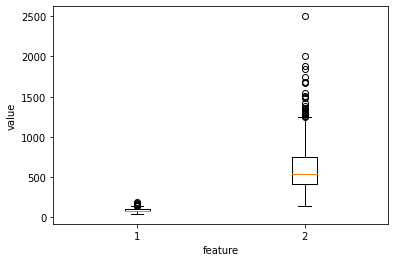

In [10]:
# 스케일을 조정하지 않고 모델 훈련을 해보자
# 훈련 데이터를 준비하고 스케일 비교하기

print(cancer.data[[2, 3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

# 두 특성의 스케일 차이가 큰 것을 확인할 수 있다.

In [11]:
print(x.shape)
k = np.ones(x.shape[1])
print(k)
# 그러니까 아래에서 x.shape[1] 이라는 건
# 569x30 크기 배열에 1을 전부 채워 넣은 것 !
# 아래에서 한 행 ! 샘플 한개에 대한 30개 특성에 대한 w값들이 들어있는 거를 계속 append하면서 쌓아나가는것!

(569, 30)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [12]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []  # 훈련 세트에 대한 손실을 기록할 변수
        self.val_losses = []  # 검증 세트에 대한 손실을 기록할 변수
        self.w_history = []
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b    # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err          # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):  # 검증 세트를 전달받을 수 있도록 x_val, y_val 추가
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())       # 가중치를 기록합니다.
        np.random.seed(42)                         # 랜덤 시드를 지정합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다.
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                # 그래디언트에서 페널티 항의 미분 값을 더합니다
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.lr * w_grad         # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 가중치를 기록합니다.
                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y) + self.reg_loss())
            # 검증 세트에 대한 손실을 계산합니다
            self.update_val_loss(x_val, y_val)

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) >= 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
    
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):  # 검증 세트의 손실을 계산하는 함수
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])     # 정방향 계산
            a = self.activation(z)         # 활성화 함수 적용
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

In [13]:
# 스케일 조정하지 않고 

layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

0.9120879120879121

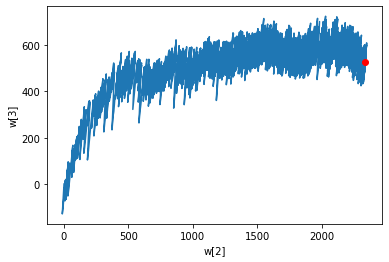

In [14]:
# 기록된 가중치들의 변화 확인하기

w2 = []
w3 = []
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

# w3값이 크게 요동치며 변화하는 것을 볼 수 있다.

In [15]:
# 표준화 방법으로 스케일을 조정해서 모델을 훈련해 보자

train_mean = np.mean(x_train, axis = 0)
train_std = np.std(x_train, axis = 0)
x_train_scaled = (x_train-train_mean) / train_std

In [16]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)

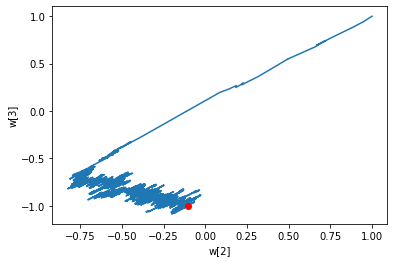

In [17]:
w2 = []
w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

# w2와 w3의 변화 비율이 비슷하기 때문에 대각선 방향으로 가중치가 이동하는 것을 알 수 있다.

In [18]:
layer2.score(x_val, y_val)

# 성능이 매우 좋지 않다 ! -> 검증 세트도 표준화 해줘야 한다 !

0.37362637362637363

In [19]:
val_mean = np.mean(x_val, axis = 0)
val_std = np.std(x_val, axis = 0)
x_val_scaled = ( x_val - val_mean) / val_std
layer2.score(x_val_scaled, y_val)

0.967032967032967

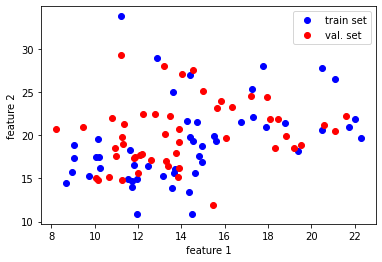

In [20]:
# 훈련 세트와 검증 세트가 다른 비율로 스케일이 조정되는 경우에 대해 알아보자
# 우선 원본 훈련 세트와 검증 세트로 산점도 그리기

plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

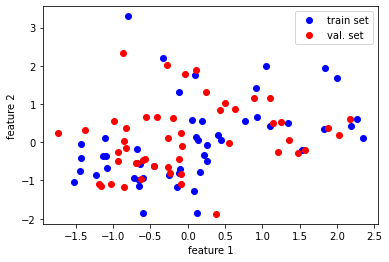

In [21]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

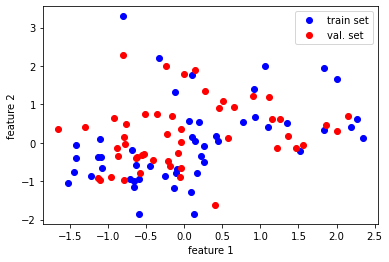

In [22]:
# 훈련 세트의 평균, 표준 편차로 검증 세트를 전처리 한다 !

x_val_scaled = ( x_val - train_mean) / train_std

plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [23]:
# 다시 모델 평가를 해보자 !

layer2.score(x_val_scaled, y_val)

# 성능이 오른 것을 확인할 수 있다 !

0.967032967032967

## 05-2 과대적합과 과소적합을 알아보자

In [24]:
# 표준화된 훈련 세트와 검증 세트를 이용해서 단일층 신경망을 훈련

layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)

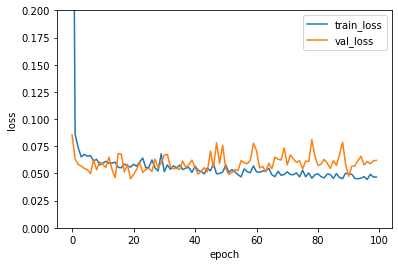

In [25]:
# 위 과정에서 에포크 마다 훈련 세트와 검증 세트의 손실값을 저장해 두었는데 이 값을 이용해서 그래프를 그려보자

plt.ylim(0, 0.2)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

# 그래프를 보면 검증 손실이 대략 20번째 에포크 이후에 훈련 세트보다 높아진다.
# 즉 에포크가 진행됨에 따라 가중치는 훈련 세트에 잘 맞게 되지만 검증 세트에는 잘 맞지 않게 되는 것이다.
# 즉 이 모델은 20번의 에포크 이후에는 훈련할 필요가 없다. 

In [26]:
# 이렇게 훈련을 일찍 멈추는 기법을 조기 종료 라고 한다.
# 20번의 에포크 까지만 모델을 훈련하고 검증 세트의 성능을 확인해 보자.

layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs = 20)
layer4.score(x_val_scaled, y_val)

0.978021978021978